k-NN вручную

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.spatial import distance

In [ ]:
data = '''id,X,Y,Class
1,96,95,0
2,15,17,0
3,85,76,0
4,70,37,0
5,64,64,0
6,62,24,1
7,48,45,1
8,75,99,1
9,95,58,0
10,50,34,0
'''
df = pd.read_csv(io.StringIO(data), index_col='id')
df

,X,Y,Class
id,,,
1,96,95,0
2,15,17,0
3,85,76,0
4,70,37,0
5,64,64,0
6,62,24,1
7,48,45,1
8,75,99,1
9,95,58,0


Важно: Здесь, поскольку мы имеем дело с синтететическими данными и рассматриваем учебный пример, в угоду простоты восприятия масштабировать признаки не будем.

Зададим сразу и тестовый объект. Напомним, что алгоритм k-NN — это «ленивый» алгоритм, он учится в процессе предсказания.

In [ ]:
NewObject = np.array([39, 22])

Визуализируем наши тренировочные данные, а также тестовый объект, и попробуем его классифицировать в зависимости от того, какое расстояние измерять.


(0.0, 80.0)

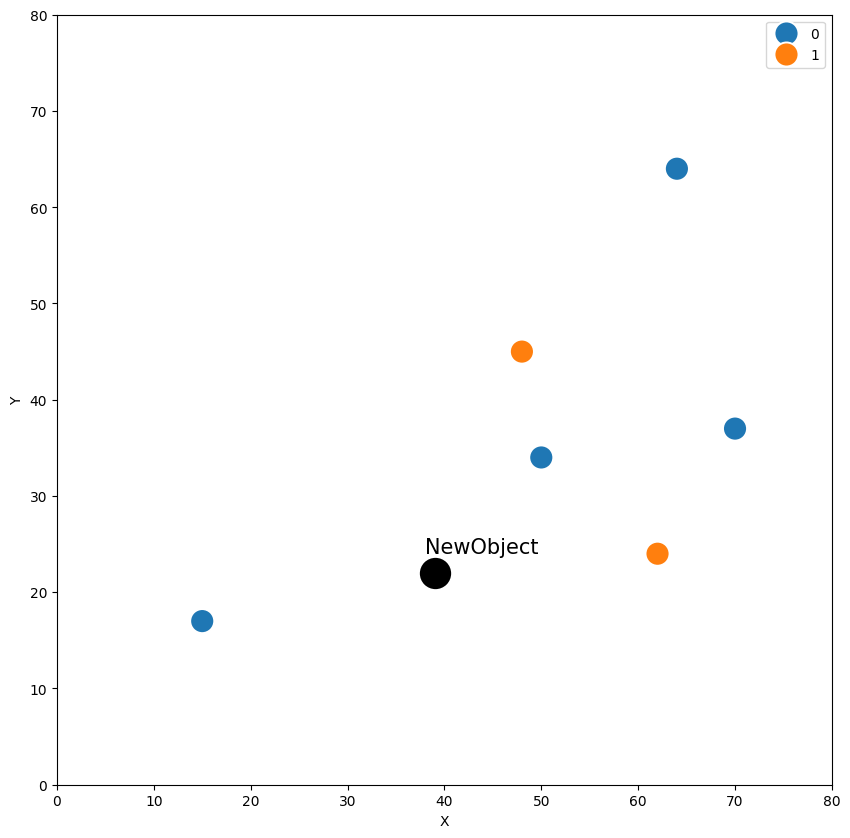

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext = (NewObject[0]-1, NewObject[1]+2), fontsize=15)
plt.xlim(0, 80)
plt.ylim(0, 80)

Вычислим стандартные (евклидовы) расстояния от тестового объекта до всех остальных.

In [ ]:
p = 2
df['Distance'] = [distance.minkowski(obj, NewObject, p=p) for index, obj in df.iloc[:,:2].iterrows()]
df

,X,Y,Class,Distance
id,,,,
1,96,95,0,92.617493
2,15,17,0,24.515301
3,85,76,0,70.936591
4,70,37,0,34.438351
5,64,64,0,48.877398
6,62,24,1,23.086793
7,48,45,1,24.698178
8,75,99,1,85.000000
9,95,58,0,66.573268


Найдем k ближайших соседей для k = 3.

In [ ]:
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k = 3
ids, dists = neighbors(k)
df.loc[ids]

,X,Y,Class,Distance
id,,,,
10,50,34,0,16.278821
6,62,24,1,23.086793
2,15,17,0,24.515301


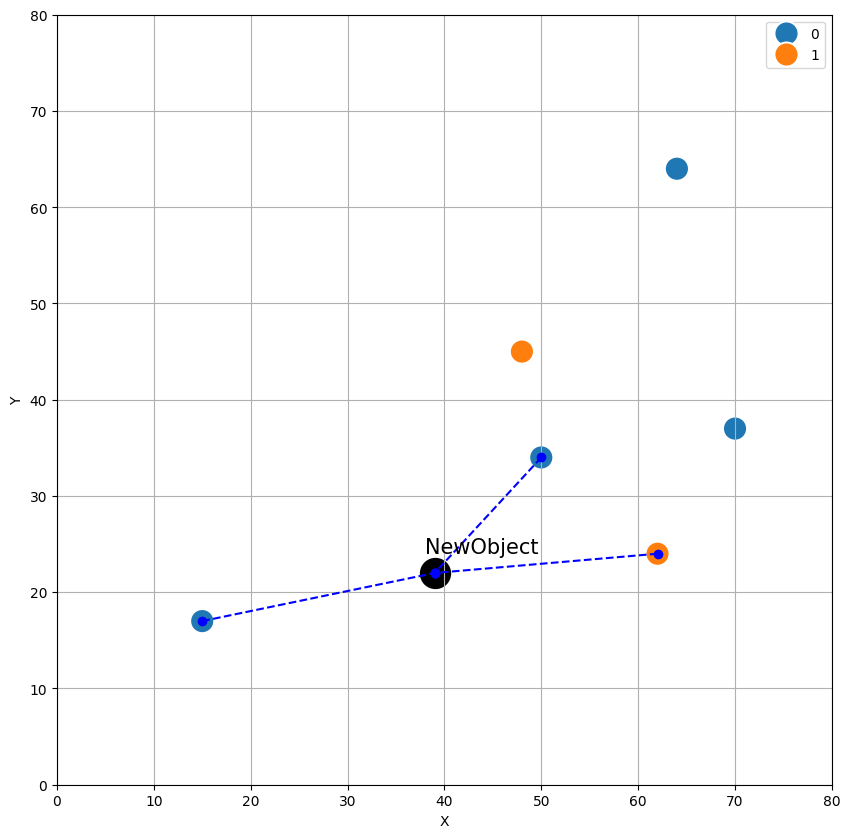

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1, NewObject[1]+2), fontsize=15)
plt.xlim(0, 80)
plt.ylim(0, 80)
for i, item in df.loc[ids].iterrows():
  x_values = [item['X'], NewObject[0]]
  y_values = [item['Y'], NewObject[1]]
  plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

Для классификации будут использоваться те объекты, которые попадают в соответствующую окрестность (в «круг»).

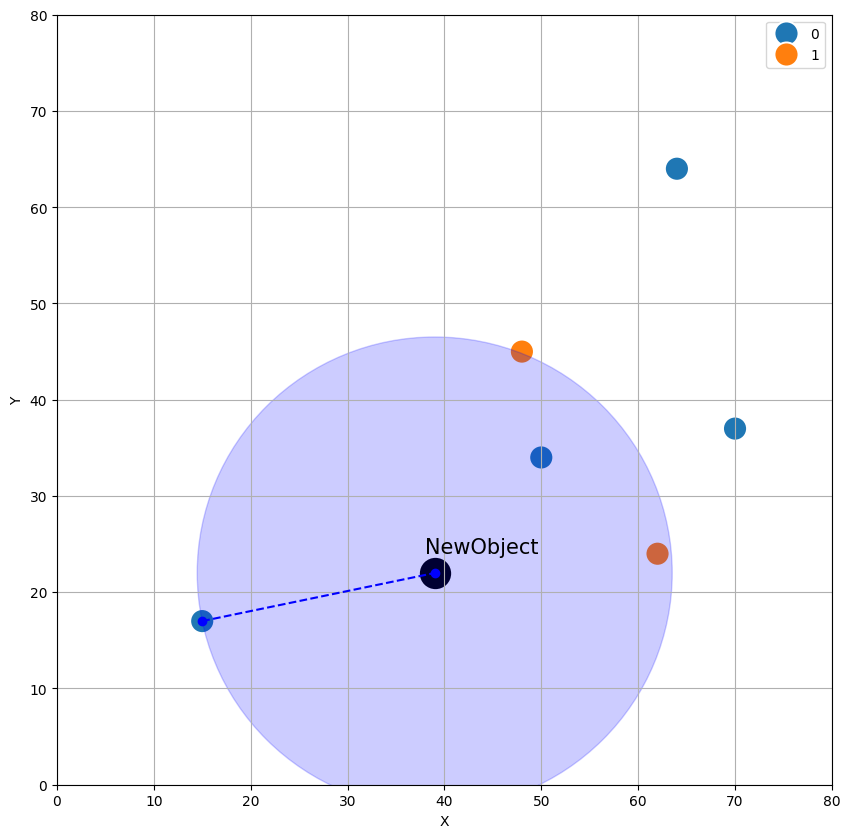

In [ ]:
from matplotlib.patches import Circle
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1, NewObject[1]+2), fontsize=15)
circle1 = plt.Circle((NewObject[0], NewObject[1]), dists[k-1], color='b', alpha=0.2)
plt.gca().add_patch(circle1)
plt.xlim(0, 80)
plt.ylim(0, 80)
x_values = [df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], NewObject[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

А что получится, если использовать манхэттенское расстояние?

In [ ]:
p = 1
df['Distance'] = [distance.minkowski(obj, NewObject, p=p) for index, obj in df.iloc[:,:2].iterrows()]
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k = 3
ids, dists = neighbors(k)
df.loc[ids]

,X,Y,Class,Distance
id,,,,
10,50,34,0,23.0
6,62,24,1,25.0
2,15,17,0,29.0


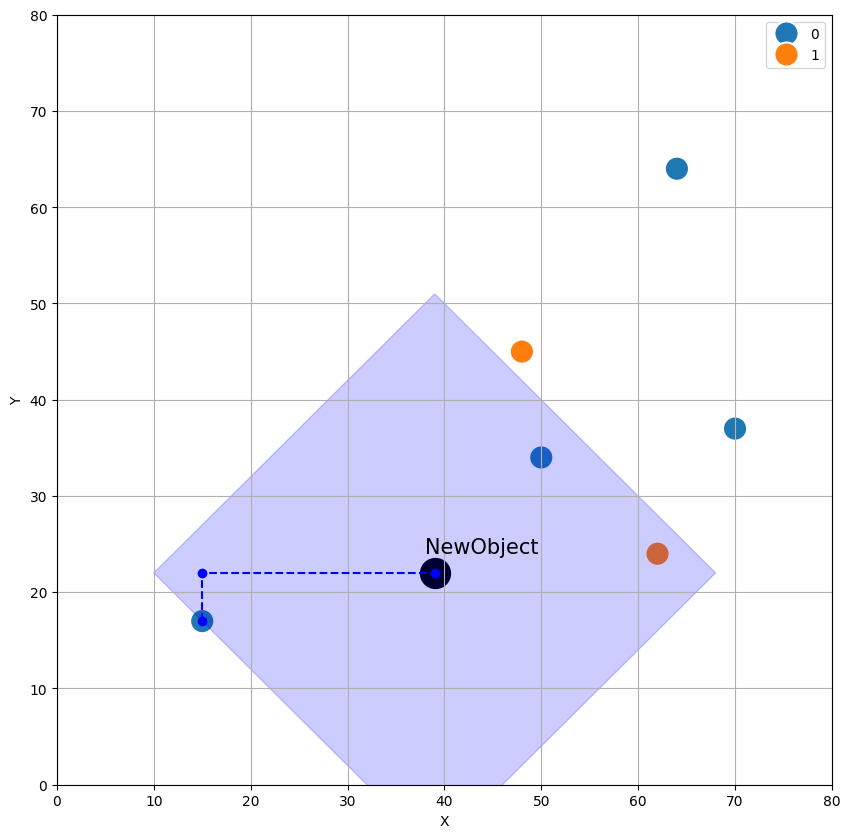

In [ ]:
from matplotlib.patches import Polygon
polygon_dots = np.array([[NewObject[0]+dists[k-1], NewObject[1]], [NewObject[0], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]], [NewObject[0], NewObject[1]-dists[k-1]]])
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext = (NewObject[0]-1, NewObject[1]+2), fontsize=15)

polygon1 = plt.Polygon(polygon_dots, color='b', alpha=0.2)
plt.gca().add_patch(polygon1)
plt.xlim(0, 80)
plt.ylim(0, 80)
x_values = [df.loc[ids[k-1]]['X'], df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], NewObject[1], NewObject[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

А если использовать расстояние Чебышёва?

In [ ]:
df['Distance'] = [distance.chebyshev(obj, NewObject) for index, obj in df.iloc[:,:2].iterrows()]
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k = 3
ids, dists = neighbors(k)
df.loc[ids]

,X,Y,Class,Distance
id,,,,
10,50,34,0,12
6,62,24,1,23
7,48,45,1,23


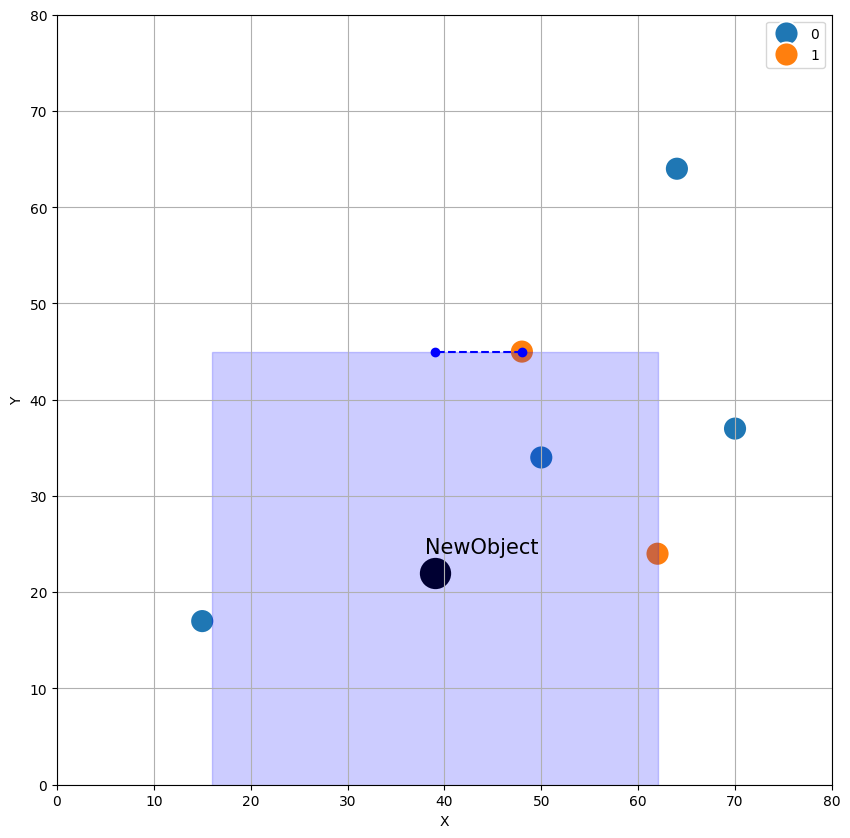

In [ ]:
from matplotlib.patches import Polygon
polygon_dots = np.array([[NewObject[0]+dists[k-1], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]-dists[k-1]], [NewObject[0]+dists[k-1], NewObject[1]-dists[k-1]]])
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1, NewObject[1]+2), fontsize=15)
polygon1 = plt.Polygon(polygon_dots, color='b', alpha=0.2)
plt.gca().add_patch(polygon1)
plt.xlim(0, 80)
plt.ylim(0, 80)
x_values = [df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], df.loc[ids[k-1]]['Y']]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

**Индивидуальное задание 3.3.1 (Python)**

Задача 2
1.0/1.0 point (graded)
Представленный набор данных — Набор данных получен в результате переписи населения  года и содержит информацию о некотором количестве людей, проживающих в США. Задача состоит в том, чтобы предсказать, зарабатывает человек более 50 000 $ в год или нет.

ВАЖНО: Задания с подробными пояснениями представлены в блокноте. Выполняя задания в блокноте, следует вводить полученные ответы в соответствующие поля ввода ниже. Рекомендуем вводить ответы поэтапно, для этого специально предусмотрено достаточное количество попыток.

Избавьтесь от признаков education и marital-status. Удалите соответствующие колонки из набора данных. Определите количество числовых и нечисловых признаков.

Для начала рассмотрим так называемую матрицу ошибок (confusion matrix)
-- способ разделить объекты на $4$ группы в зависимости от комбинации
истинного класса и ответа классификатора:

-   TP (True Positives) -- верно классифицированные объекты, исходно     относящиеся к классу "$+1$";

-   TN (True Negatives) -- верно классифицированные объекты, исходно     относящиеся к классу "$-1$";

-   FN (False Negatives) -- неверно классифицированные объекты, исходно     относящиеся к классу "$+1$" (ошибка I рода);

-   FP (False Positives) -- неверно классифицированные объекты, исходно     относящиеся к классу "$-1$" (ошибка II рода).

Обычно, конечно, оперируют не абсолютными показателями, а относительными
-- долями (rates), находящимися в диапазоне от $0$ до $1$:

-   доля правильных ответов классификатора (иногда -- точность): $$\mathsf{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}.$$ Эта величина показывает отношение количества верно классифицированных объектов к общему количеству классифицируемых объектов и, грубо говоря, оценивает вероятность случайному объекту быть правильно классифицированным.

-   доля истинно положительных примеров -- True Positives Rate (TPR) или     Sensitivity (чувствительность) или Recall: $$\mathsf{T P R}=\frac{T P}{T P+F N}.$$ Эта величина показывает отношение количества верно классифицированных объектов, относящихся к классу "$+1$", к общему количеству объектов класса "$+1$". Иными словами -- это оценка вероятности, что объект, относящийся к классу "$+1$" будет классифицирован корректно.

-   доля ложно положительных примеров обозначается как -- False Positives Rate (FPR): $$\mathsf{F P R}=\frac{F P}{FP + TN}.$$ Величина показывает отношение количества неверно классифицированных объектов, относящихся к классу "$-1$", к общему количеству объектов класса "$-1$", или оценивает вероятность, что объект, относящийся к классу "$-1$", будет классифицирован неверно.

-   Специфичность (Specificity) или True Negatives Rate (TNR): $$\mathsf{TNR} = 1 - \mathsf{F P R} =\frac{T N}{T N+F P}.$$ Величина показывает отношение количества верно классифицированных объектов, относящихся к классу "$-1$", к общему количеству объектов класса <\<$-1$", или оценивает вероятность, что объект, относящийся к классу "$-1$", будет классифицирован верно.

-   Precision (точность): $$\mathsf{Precision} =\frac{TP}{TP + FP}.$$ Величина показывает, какая доля объектов, отнесенных классификатором классу "$+1$", действительно относится к этому классу.

Естественно возникает вопрос, нет ли какого-то обобщающего критерия,
который может характеризовать качество построенной модели. Один из них --
так называемая $F$-мера ($F_1$-мера, $F$ score, $F_1$ score)
определяется следующим соотношением:
$$F = F_1 = 2 \cdot \frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision} + \mathsf{Recall}}.$$

**Замечание**. *$F$-мера является средним гармоническим величин
$\mathsf{Precision}$ и $\mathsf{Recall}$ и заключена в диапазоне
$[0, 1]$. Среднее гармоническое обладает важным свойством: оно близко к
нулю, если хотя бы один аргументов близок к нулю. Поэтому оно является
куда более предпочтительным, чем, скажем, среднее арифметическое: если
алгоритм относит все объекты к положительному классу, то
$\mathsf{Recall}= 1$, а $\mathsf{Precision}$, скорее всего, будет
небольшим. Но тогда среднее арифметическое будет больше, чем $0.5$, что,
конечно, никуда не годится.*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/3b5e697be14f493785e3d21577f9fcb3/asset-v1:ITMO+DS+2024+type@asset+block/adult_data_train.csv')

Исходя из описания признаков можно сразу избавиться от признаков education и marital-status. Удалите соответствующие колонки из набора данных.

In [ ]:
df = df.drop(['education', 'marital-status'], axis = 1)
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


Определите количество числовых и нечисловых признаков

In [ ]:
cat_features = ['workclass', 'occupation',
                   'relationship', 'race', 'sex', 'native-country']

print('Количество числовых признаков: ', df.select_dtypes(include=['int64']).shape[1]-1)
print('Количество нечисловых признаков: ', len(cat_features))

Количество числовых признаков:  6
Количество нечисловых признаков:  6


Постройте гистограмму распределения объектов по классам. Вычислите долю объектов класса  0 .

Доля объектов класса 0:  0.7591753685503686
Доля объектов класса 1:  0.24082463144963145


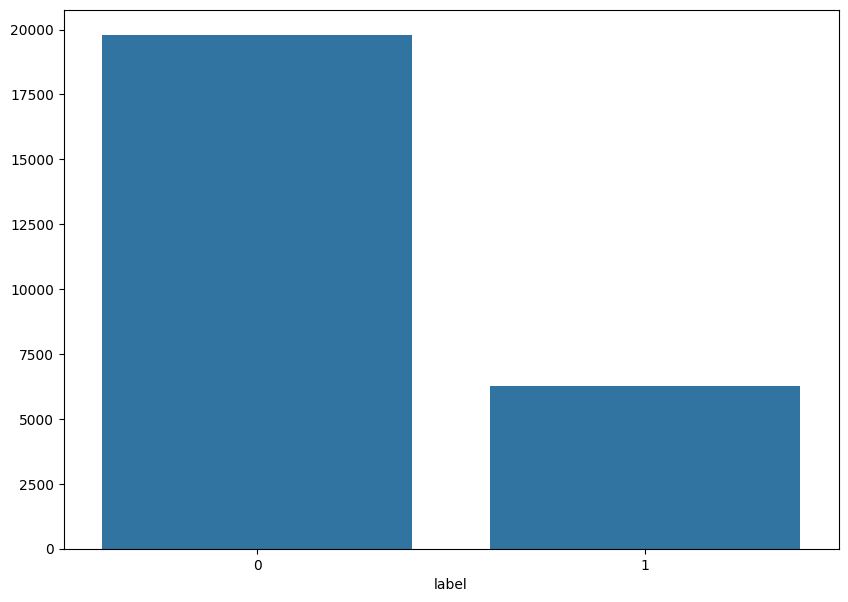

In [ ]:
column = 'label'
plt.gcf().set_size_inches(10, 7)
sns.barplot(x=df[[column]].groupby(df[column]).count().index, y=df[column].groupby(df[column]).count().to_numpy())
print('Доля объектов класса 0: ', len(df[df[column] == 0])/len(df))
print('Доля объектов класса 1: ', len(df[df[column] == 1])/len(df))

Построение базовой модели

В качестве первого приближения имеет смысл построить модель классификации, опираясь исключительно на числовые признаки.

Отберите из набора данных только числовые признаки. При помощи train_test_split() разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке label.

Вычислите выборочное среднее колонки fnlwgt тренировочного набора данных.

Обучите модель KNeighborsClassifier() с параметрами по умолчанию на тренировочных данных.

Как видно из предыдущего пункта, в наборе данных наблюдается явный дисбаланс представителей классов. Это следует учесть при оценке модели. Вычислите f1_score модели на тестовых данных (рекомендуем использовать соответствующую функцию.
https://www.google.com/url?q=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.metrics.f1_score.html

В качестве альтернативы можно использовать так называемый classification_report()  https://www.google.com/url?q=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.metrics.classification_report.html  
, где приведены сразу несколько метрик (не стоит забывать про параметр digits).

Мои параметры
Отберите из набора данных только числовые признаки. При помощи train_test_split() разбейте набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=11. Используйте стратификацию по колонке label.

Параметр digits в функции classification_report из библиотеки scikit-learn используется для указания количества знаков после запятой, которые будут отображаться в отчете о классификации. В вашем коде digits = 3 означает, что все числовые значения в отчете будут округлены до трех знаков после запятой.

Почему используется digits = 3?
Четкость и читаемость:

Установка digits = 3 делает отчет более читаемым, так как числа не будут слишком длинными. Это особенно полезно, когда вы хотите быстро просмотреть результаты и не углубляться в детали.

Стандартные практики:

В большинстве случаев, три знака после запятой достаточно для представления точности метрик, таких как точность, полнота и F1-мера. Это стандартная практика, которая используется во многих проектах и учебных материалах.

Сравнение результатов:

При сравнении результатов разных моделей или разных настроек параметров, использование одинакового количества знаков после запятой упрощает сравнение.

Пример отчета с digits = 3
Рассмотрим пример отчета о классификации с digits = 3:

from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]

report = classification_report(y_true, y_pred, digits=3)
print(report)

Вывод может выглядеть следующим образом:

Copy
              precision    recall  f1-score   support

           0      0.500     1.000     0.667         1
           1      0.000     0.000     0.000         1
           2      1.000     0.667     0.800         3

    accuracy                          0.600         5
   macro avg      0.500     0.556     0.489         5
weighted avg      0.700     0.600     0.613         5
Как изменить количество знаков после запятой?
Если вы хотите изменить количество знаков после запятой, вы можете установить другое значение для параметра digits. Например, если вы хотите видеть четыре знака после запятой, вы можете установить digits = 4:


report = classification_report(y_test, y_pred, digits=4)
print(report)

Заключение
Параметр digits в функции classification_report используется для указания количества знаков после запятой в отчете о классификации. Установка digits = 3 является распространенной практикой, которая делает отчет более читаемым и удобным для сравнения результатов. Вы можете изменить это значение в зависимости от ваших потребностей и требований к точности представления чисел.

In [ ]:
random_state = 11


df_only_numeric = df.select_dtypes(include=['int64'])

def build_model(df):
  X, y = df.drop('label', axis=1), df['label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
  knn = KNeighborsClassifier().fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  f_1_score = f1_score(y_test, y_pred)
  return X_train.fnlwgt.mean(), f_1_score, classification_report(y_test, y_pred, digits = 3)

mean, score, report = build_model(df_only_numeric)
print('Выборочноее среднее столбца fnlwgt: ', mean)
print('F_1(weighted) модели: ', score)
print('Отчет о классификации: \n', report)

Выборочноее среднее столбца fnlwgt:  190043.75909396296
F_1(weighted) модели:  0.3689119170984456
Отчет о классификации: 
               precision    recall  f1-score   support

           0      0.802     0.919     0.857      3955
           1      0.527     0.284     0.369      1255

    accuracy                          0.766      5210
   macro avg      0.665     0.602     0.613      5210
weighted avg      0.736     0.766     0.739      5210



Стоит помнить, что KNN является метрическим классификатором, поэтому значения признаков перед обучением модели следует нормировать.

Обучите преобразование MinMaxScaler() на тренировочном наборе данных и примените его для тренировочных и тестовых данных.

Вычислите выборочное среднее колонки fnlwgt тренировочного набора данных после нормировки.

Заново обучите и оцените модель на преобразованных данных. Вычислите f1_score(average='weighted') модели.

In [ ]:
def build_model(df):
  X, y = df.drop('label', axis=1), df['label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
  scaler = MinMaxScaler().fit(X_train)            # линейная нормировка
  X_train_scaled = scaler.transform(X_train)
  #!!! ВАЖНО. Скейлер не надо обучать повторно. Просто применяем к тестовым данным
  X_test_scaled = scaler.transform(X_test)
  knn = KNeighborsClassifier().fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  f_1_score = f1_score(y_test, y_pred)
  return X_train_scaled[:,1].mean(), f_1_score

mean, score = build_model(df_only_numeric)
print('Выборочноее среднее столбца fnlwgt: ', mean)
print('F_1(weighted) модели: ', score)

Выборочноее среднее столбца fnlwgt:  0.1207255804009474
F_1(weighted) модели:  0.5092250922509225


Чтобы визуализировать результаты предсказаний модели (y_pred) и реальных меток (y_test), можно использовать различные методы. Один из распространенных способов — построение матрицы ошибок (confusion matrix) и графика распределения предсказаний.

Дополнительный код для визуализации результатов
Добавим код для визуализации результатов после вызова функции build_model. Мы будем использовать библиотеку seaborn для построения матрицы ошибок и matplotlib для других графиков.

Пояснение кода
Функция build_model_with_predictions:

Эта функция аналогична build_model, но также возвращает предсказанные метки (y_pred) и реальные метки (y_test).

Матрица ошибок:

Используем confusion_matrix для создания матрицы ошибок и seaborn.heatmap для визуализации.

График распределения предсказаний:

Используем seaborn.histplot для построения гистограммы распределения реальных и предсказанных меток.

Отчет о классификации:

Используем classification_report для вывода отчета о классификации с точностью, полнотой и F1-мерой.

Заключение
Этот код позволит вам визуализировать результаты предсказаний модели и реальных меток, что поможет лучше понять, насколько хорошо модель работает. Матрица ошибок и график распределения предсказаний — это полезные инструменты для анализа производительности модели.

Выборочноее среднее столбца fnlwgt:  0.1207255804009474
F_1(weighted) модели:  0.5092250922509225
Выборочноее среднее столбца fnlwgt:  0.1207255804009474
F_1(weighted) модели:  0.5092250922509225


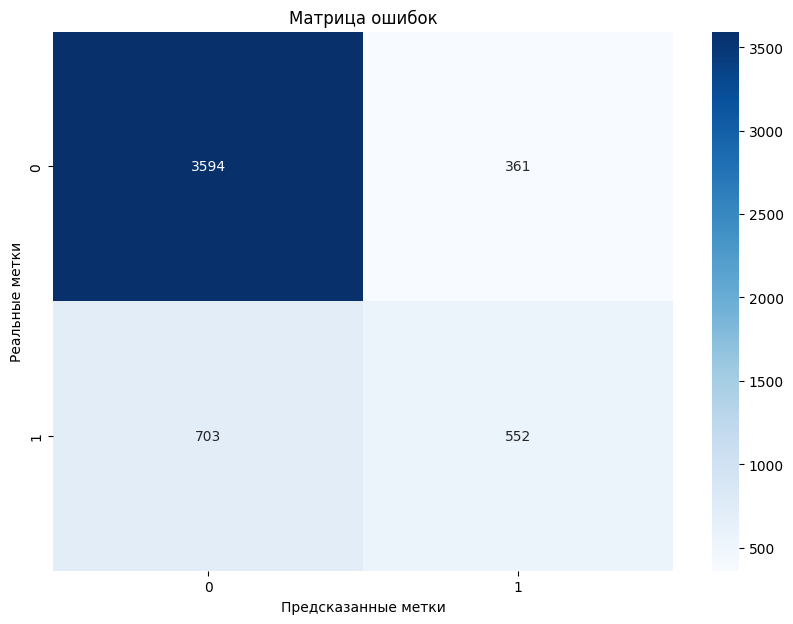

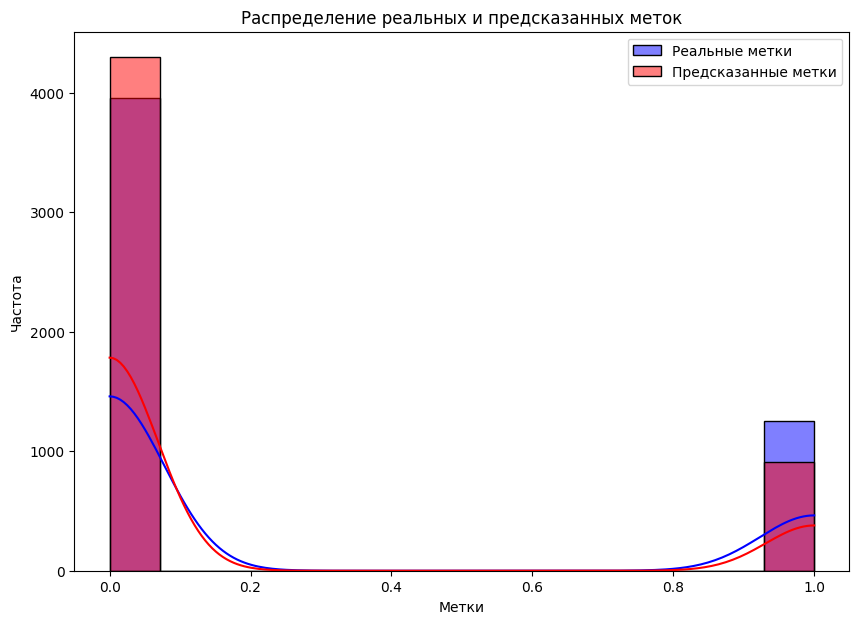

Отчет о классификации:
              precision    recall  f1-score   support

           0      0.836     0.909     0.871      3955
           1      0.605     0.440     0.509      1255

    accuracy                          0.796      5210
   macro avg      0.720     0.674     0.690      5210
weighted avg      0.781     0.796     0.784      5210



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Вызов функции build_model
mean, score = build_model(df_only_numeric)
print('Выборочноее среднее столбца fnlwgt: ', mean)
print('F_1(weighted) модели: ', score)

# Получение y_pred и y_test из функции build_model
def build_model_with_predictions(df):
    X, y = df.drop('label', axis=1), df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn = KNeighborsClassifier().fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f_1_score = f1_score(y_test, y_pred)
    return X_train_scaled[:,1].mean(), f_1_score, y_pred, y_test

mean, score, y_pred, y_test = build_model_with_predictions(df_only_numeric)

# Вывод результатов
print('Выборочноее среднее столбца fnlwgt: ', mean)
print('F_1(weighted) модели: ', score)

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Реальные метки')
plt.title('Матрица ошибок')
plt.show()

# Построение графика распределения предсказаний
plt.figure(figsize=(10, 7))
sns.histplot(y_test, color='blue', label='Реальные метки', kde=True)
sns.histplot(y_pred, color='red', label='Предсказанные метки', kde=True)
plt.xlabel('Метки')
plt.ylabel('Частота')
plt.title('Распределение реальных и предсказанных меток')
plt.legend()
plt.show()

# Вывод отчета о классификации
print('Отчет о классификации:')
print(classification_report(y_test, y_pred, digits=3))

Видно, что после линейной нормировки качество выросло.

Важно: На дальнейших этапах подразумевается использование линейной нормировки непосредственно перед обучением без дополнительных напоминаний.


2. Работа с нечисловыми признаками
Визуализация
Для дальнейшего улучшения качества модели имеет смысл задействовать нечисловые признаки исходного датасета (без колонок education и marital-status).

Постройте гистограммы, иллюстрирующие частоту того или иного значения по каждому нечисловому признаку, например, при помощи sns.barplot().

workclass
occupation
relationship
race
sex
native-country


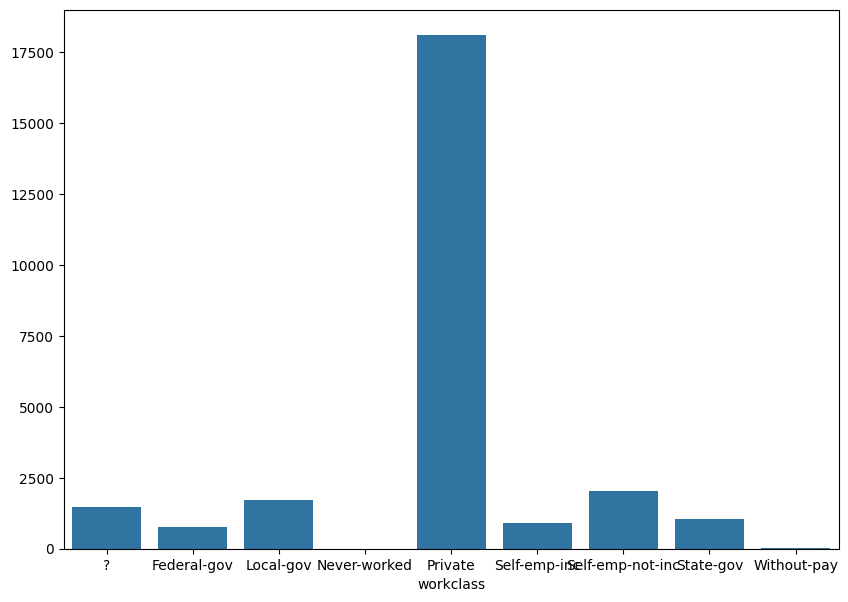

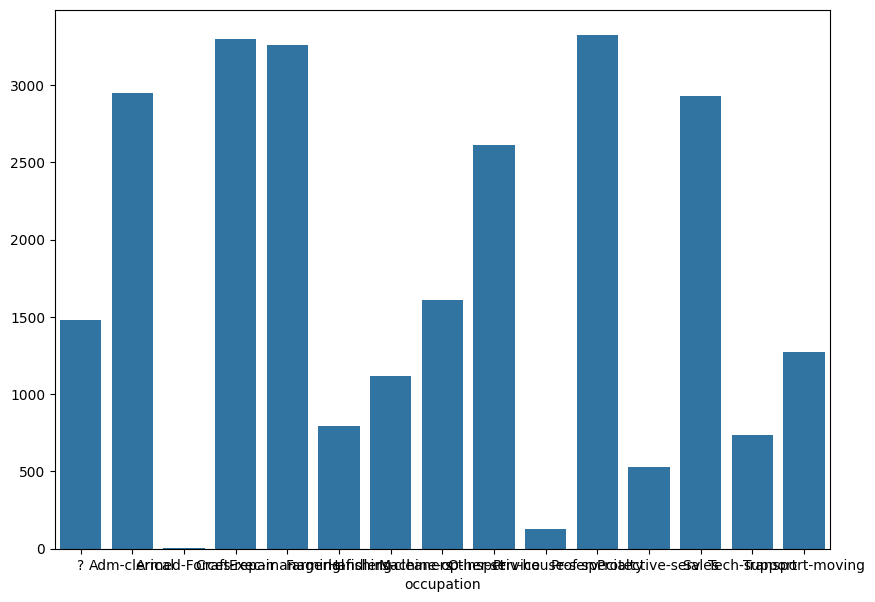

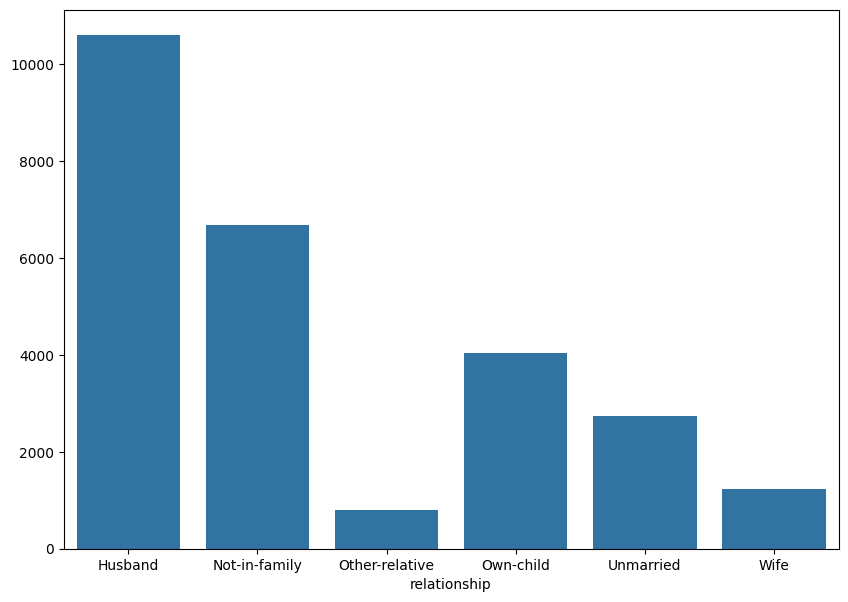

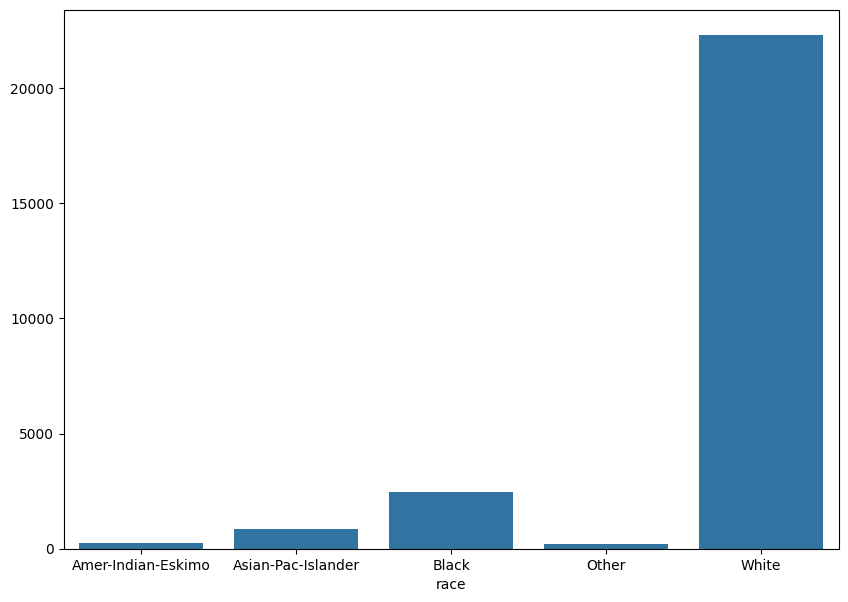

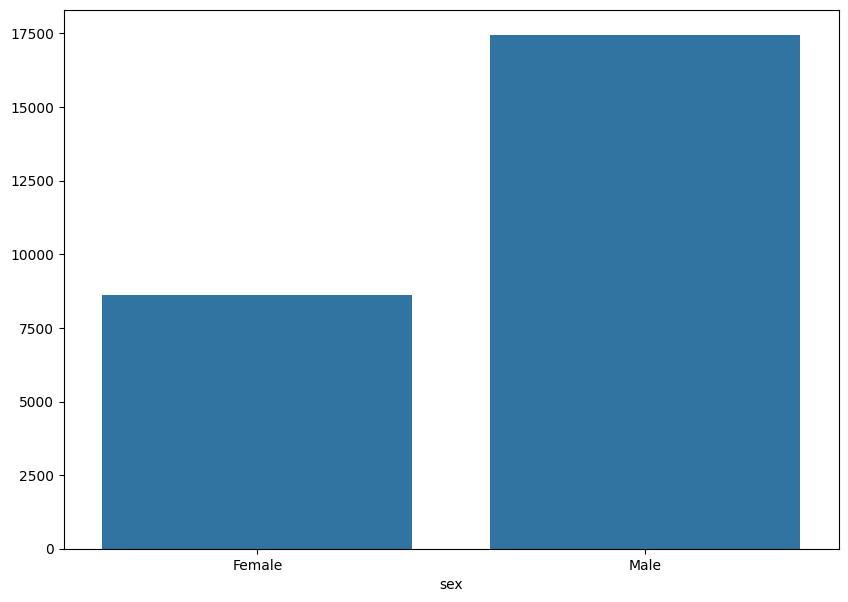

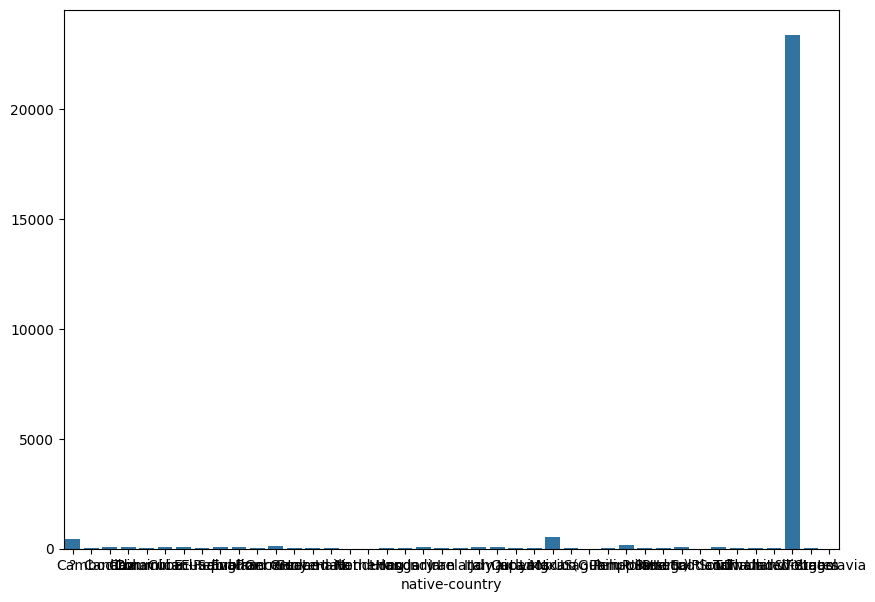

In [ ]:
import os

if not os.path.exists('pictures'):
   os.makedirs('pictures')

   # Автоматическое определение категориальных признаков
 # cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Введите название признака, значения в рамках которого имеют такое же распределение частот, как на изображении
df_cat = df[cat_features]           #  этот cat_features  параметр как и select_dtypes    формируется выше по коду он уже есть
for i,column in enumerate(cat_features):
  plt.figure(i)
  plt.gcf().set_size_inches(10, 7)
  sns.barplot(x=df_cat[[column]].groupby(df_cat[column]).count().index, y=df_cat[column].groupby(df_cat[column]).count().to_numpy())
  print(column)

Удаление пропущенных значений
Определите число строк исходного набора данных (без колонок education и marital-status), в которых присутствует хотя бы одно пропущенное значение.

In [ ]:
df.isnull().values.any()

False

In [ ]:
df[df.eq('?').any(axis=1)]

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
9,28,?,149646,10,?,Own-child,White,Female,0,0,20,?,0
14,60,?,251572,9,?,Not-in-family,White,Male,0,0,35,Poland,0
15,34,?,317219,10,?,Wife,White,Female,0,0,20,United-States,1
40,36,?,94954,11,?,Not-in-family,White,Female,0,0,20,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,18,?,165532,8,?,Own-child,White,Male,0,0,25,United-States,0
26007,19,Private,258633,10,Adm-clerical,Own-child,White,Female,0,0,25,?,0
26011,45,?,260953,14,?,Husband,White,Male,0,0,40,United-States,0
26021,66,?,129476,13,?,Husband,White,Male,0,0,6,United-States,0


In [ ]:
df[df.eq(' ').any(axis=1)]

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label


In [ ]:
df_drop_nans = df.replace('?', np.nan)
df_drop_nans = df_drop_nans.dropna()
print('Число строк содержащих хоть один пропуск: ', len(df) - len(df_drop_nans))

Число строк содержащих хоть один пропуск:  1914


Видно, что в датасете содержится менее 10% строк, содержащих пропуски. Выкидывать такое количество строк — не очень хорошее дело, но почему бы не попробовать обойтись без них.

Удалите строки, содеражащие пропуски. Произведите one-hot кодировние нечисловых признаков, например, с помощью pd.get_dummies(drop_first=True).

Введите число полученных признаков.

In [ ]:
df_drop_nans_dummies = pd.get_dummies(df_drop_nans, drop_first=True)
print('Число полученных признаков: ', df_drop_nans_dummies.shape[1]-1)
df_drop_nans_dummies

Число полученных признаков:  75


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,43,101950,14,0,0,45,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,40,24763,10,6849,0,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,24,113936,13,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,51,237630,9,7298,0,50,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26044,39,421633,10,0,0,30,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
26045,55,82098,9,0,0,55,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
26046,26,50053,13,0,0,55,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


Обучите модель классификации аналогично тому, как это было проделано для базовой модели. Вычислите f1_score(average='weighted') модели.



In [ ]:
mean, score = build_model(df_drop_nans_dummies)
print('Выборочноее среднее столбца fnlwgt: ', mean)
print('F_1(weighted) модели: ', score)

Выборочноее среднее столбца fnlwgt:  0.12008287565804131
F_1(weighted) модели:  0.622733303847855


Точность модели увеличилась по сравнению с моделью, которая использовала только числовые признаки.

Заполнение пропущенных значений
Возможно точность еще повысится, если задействовать строки с пропущенными значениями. Используя исходный датасет (без колонок education и marital-status), заполните пропуски самым часто встречающимся значением в рамках столбца.

In [ ]:
df_imputed = df.replace('?', np.nan)
df_imputed = df_imputed.fillna(df_imputed.mode().iloc[0])   # mode наиболее часто встречающееся значение столбца им и заполняем
df_imputed

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,Private,122244,9,Prof-specialty,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


Далее по уже знакомому сценарию: one-hot, split, scaling, обучение и оценка.

Вычислите f1_score(average='weighted') модели.

In [ ]:
df_imputed_dummies = pd.get_dummies(df_imputed, drop_first=True)
df_imputed_dummies

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,43,101950,14,0,0,45,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,20,122244,9,0,0,28,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,40,24763,10,6849,0,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,24,113936,13,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26044,39,421633,10,0,0,30,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26045,55,82098,9,0,0,55,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26046,26,50053,13,0,0,55,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
mean, score = build_model(df_imputed_dummies)
print('Выборочноее среднее столбца fnlwgt: ', mean)
print('F_1(weighted) модели: ', score)

Выборочноее среднее столбца fnlwgt:  0.1207255804009474
F_1(weighted) модели:  0.6137610806247362




НЕМНОГО ПОПРОБОВАЛ ПОСОМТРЕТЬ РАБОТУ С ДАННЫМИ

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/3b5e697be14f493785e3d21577f9fcb3/asset-v1:ITMO+DS+2024+type@asset+block/adult_data_train.csv')

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.589373,1.900018e+05,10.079661,1060.682740,88.026259,40.480728,0.240825
std,13.641016,1.055103e+05,2.583186,7299.149781,404.983608,12.417613,0.427592
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.181942e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.785535e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.374578e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
# Создаем новый DataFrame, содержащий только столбцы 'id', 'fnlwgt' и 'label'
df_filtered = df.filter(items=['id', 'fnlwgt', 'label'])

# Выводим новый DataFrame
print(df_filtered.head())

   fnlwgt  label
0   37210      1
1  101950      0
2  122244      0
3   24763      0
4  113936      0


In [ ]:
# Подсчет количества людей с зарплатой больше и меньше 50 тысяч
label_counts = df['label'].value_counts()

# Выводим результаты
print("Количество людей с зарплатой больше 50 тысяч:", label_counts[1])
print("Количество людей с зарплатой меньше 50 тысяч:", label_counts[0])

Количество людей с зарплатой больше 50 тысяч: 6273
Количество людей с зарплатой меньше 50 тысяч: 19775


In [ ]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/3b5e697be14f493785e3d21577f9fcb3/asset-v1:ITMO+DS+2024+type@asset+block/adult_data_train.csv')

# Вопрос 1: Создание нового DataFrame с колонками 'id', 'fnlwgt' и 'label'
df_filtered = df.filter(items=['id', 'fnlwgt', 'label'])

# Выводим новый DataFrame
print("Новый DataFrame:")
print(df_filtered.head())

# Вопрос 2: Подсчет количества людей с зарплатой больше и меньше 50 тысяч с учетом fnlwgt
label_counts = df_filtered.groupby('label')['fnlwgt'].sum()

# Выводим результаты
print("\nКоличество людей с зарплатой больше 50 тысяч:", label_counts[1])
print("Количество людей с зарплатой меньше 50 тысяч:", label_counts[0])

Новый DataFrame:
   fnlwgt  label
0   37210      1
1  101950      0
2  122244      0
3   24763      0
4  113936      0

Количество людей с зарплатой больше 50 тысяч: 1177991070
Количество людей с зарплатой меньше 50 тысяч: 3771176960


In [ ]:


# Подсчет общего количества людей с учетом значений в столбце fnlwgt и label
label_counts = df_filtered.groupby('label')['fnlwgt'].sum().reset_index()

# Переименование столбцов для удобства
label_counts.columns = ['label', 'total_people']

# Вывод результатов
print(label_counts)

   label  total_people
0      0    3771176960
1      1    1177991070


Да, метод groupby в Pandas работает по принципу группировки данных по указанному столбцу (в данном случае label) и применения агрегатной функции (в данном случае sum) к каждой группе. Это означает, что он суммирует значения в столбце fnlwgt для каждого уникального значения в столбце label.

Подробное объяснение работы groupby и sum
Группировка данных:

Метод groupby('label') группирует строки DataFrame по значениям в столбце label. Например, все строки с label=0 будут сгруппированы вместе, и все строки с label=1 будут сгруппированы вместе.

Применение агрегатной функции:

После группировки, метод sum() применяется к каждой группе. В данном случае, он суммирует значения в столбце fnlwgt для каждой группы.

Пример с подробным объяснением
Рассмотрим пример с небольшим набором данных:

python
Copy
import pandas as pd

# Пример данных
data = {
    'id': [0, 1, 2, 3, 4],
    'fnlwgt': [100, 200, 150, 300, 250],
    'label': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Группировка и суммирование
label_counts = df.groupby('label')['fnlwgt'].sum().reset_index()

# Переименование столбцов для удобства
label_counts.columns = ['label', 'total_people']

# Вывод результатов
print(label_counts)
Пояснение
Данные:

У нас есть DataFrame с тремя столбцами: id, fnlwgt и label.

Группировка:

Строки с label=0 и label=1 группируются отдельно.

Суммирование:

Для группы с label=0: суммируются значения fnlwgt (100 + 150 + 250 = 500).

Для группы с label=1: суммируются значения fnlwgt (200 + 300 = 500).

Результат:

Получаем DataFrame с двумя строками: одна строка для label=0 и одна строка для label=1, где total_people — это сумма значений fnlwgt для каждой группы.

Результат выполнения кода
Copy
   label  total_people
0      0           500
1      1           500
Заключение
Метод groupby в Pandas работает по принципу группировки данных по указанному столбцу и применения агрегатной функции к каждой группе. В данном случае, он суммирует значения в столбце fnlwgt для каждого уникального значения в столбце label, что позволяет подсчитать общее количество людей с учетом значений в столбце fnlwgt и label.

